### Imports


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA


 ### Load & First Look

In [29]:
df = pd.read_csv("/content/Expanded_data_with_more_features.csv")
print("✅ Dataset Loaded")
print(f"Shape : {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
df.head()
df.info()

✅ Dataset Loaded
Shape : (30641, 15)

Column Names:
['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  Tran

#### feature engineering - dropping unneccessary column

In [30]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

### Data Types & Missing Values

In [31]:
print("DF.Datatypes")
print(df.dtypes)
print("\n" + "=" * 50)
print("MISSING VALUES")
print()
print(df.isnull().sum())
print(f"\nTotal missing cells : {df.isnull().sum().sum()}")
print(f"Missing percentage  : {(df.isnull().sum().sum() / df.size * 100):.2f}%")

DF.Datatypes
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

MISSING VALUES

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Total missing cells : 13901
Missing percentage  : 3.24%


### Clean & Fill Missing Values


In [32]:
#trim and lower case all categorical cols
text_cols = df.select_dtypes(include='object').columns
for col in text_cols:
    df[col] = df[col].str.strip().str.lower()

# standardising parentEduc names
df['ParentEduc'] = df['ParentEduc'].replace({
    'some high school'   : 'high_school',
    'high school'        : 'high_school',
    'some college'       : 'some_college',
    "associate's degree" : 'associates_degree',
    "bachelor's degree"  : 'bachelors_degree',
    "master's degree"    : 'masters_degree',
})

# converting WklyStudyHours from category to representative numeric value since this is a numerical value in categorical col
df['WklyStudyHours'] = df['WklyStudyHours'].replace({
    '< 5'   : 2.5,
    '5 - 10': 7.5,
    '> 10'  : 12.0
})

# Fill missing values — mode for categorical, median for numerical


cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


print(f"Missing values remaining : {df.isnull().sum().sum()}")
print(f"Shape  : {df.shape}")
df.head()

Missing values remaining : 0
Shape  : (30641, 14)


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group c,bachelors_degree,standard,none,married,regularly,yes,3.0,school_bus,2.5,71,71,74
1,female,group c,some_college,standard,none,married,sometimes,yes,0.0,school_bus,7.5,69,90,88
2,female,group b,masters_degree,standard,none,single,sometimes,yes,4.0,school_bus,2.5,87,93,91
3,male,group a,associates_degree,free/reduced,none,married,never,no,1.0,school_bus,7.5,45,56,42
4,male,group c,some_college,standard,none,married,sometimes,yes,0.0,school_bus,7.5,76,78,75


### Remove Duplicates

In [33]:
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)

print(f"Rows before : {before}")
print(f"Rows after  : {after}")
print(f"Duplicates removed : {before - after}")

Rows before : 30641
Rows after  : 30640
Duplicates removed : 1


In [34]:
# Check remaining text columns
print(df.select_dtypes(include='object').columns.tolist())
print(df.dtypes)

['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans']
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours         float64
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object


### Encoding


In [35]:
# ── Ordinal columns → manual mapping (order matters)
educ_order  = {'high_school':1, 'some_college':2, 'associates_degree':3,
               'bachelors_degree':4, 'masters_degree':5}
sport_order = {'never':0, 'sometimes':1, 'regularly':2}

df['ParentEduc']    = df['ParentEduc'].map(educ_order)
df['PracticeSport'] = df['PracticeSport'].map(sport_order)

nominal_cols = ['Gender', 'LunchType', 'TestPrep', 'IsFirstChild',
                'TransportMeans', 'EthnicGroup', 'ParentMaritalStatus']

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print(f"Shape after encoding : {df.shape}")
print(f"Remaining text cols  : {df.select_dtypes(include='object').columns.tolist()}")
df.head()

Shape after encoding : (30640, 19)
Remaining text cols  : []


,ParentEduc,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus,EthnicGroup_group b,EthnicGroup_group c,EthnicGroup_group d,EthnicGroup_group e,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
0,4,2,3.0,2.5,71,71,74,False,True,True,True,True,False,True,False,False,True,False,False
1,2,1,0.0,7.5,69,90,88,False,True,True,True,True,False,True,False,False,True,False,False
2,5,1,4.0,2.5,87,93,91,False,True,True,True,True,True,False,False,False,False,True,False
3,3,0,1.0,7.5,45,56,42,True,False,True,False,True,False,False,False,False,True,False,False
4,2,1,0.0,7.5,76,78,75,True,True,True,True,True,False,True,False,False,True,False,False


In [36]:
#convert bool columns to int (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

print(df.dtypes)
(df.head())

ParentEduc                       int64
PracticeSport                    int64
NrSiblings                     float64
WklyStudyHours                 float64
MathScore                        int64
ReadingScore                     int64
WritingScore                     int64
Gender_male                      int64
LunchType_standard               int64
TestPrep_none                    int64
IsFirstChild_yes                 int64
TransportMeans_school_bus        int64
EthnicGroup_group b              int64
EthnicGroup_group c              int64
EthnicGroup_group d              int64
EthnicGroup_group e              int64
ParentMaritalStatus_married      int64
ParentMaritalStatus_single       int64
ParentMaritalStatus_widowed      int64
dtype: object


,ParentEduc,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus,EthnicGroup_group b,EthnicGroup_group c,EthnicGroup_group d,EthnicGroup_group e,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
0,4,2,3.0,2.5,71,71,74,0,1,1,1,1,0,1,0,0,1,0,0
1,2,1,0.0,7.5,69,90,88,0,1,1,1,1,0,1,0,0,1,0,0
2,5,1,4.0,2.5,87,93,91,0,1,1,1,1,1,0,0,0,0,1,0
3,3,0,1.0,7.5,45,56,42,1,0,1,0,1,0,0,0,0,1,0,0
4,2,1,0.0,7.5,76,78,75,1,1,1,1,1,0,1,0,0,1,0,0


### Outlier Detection

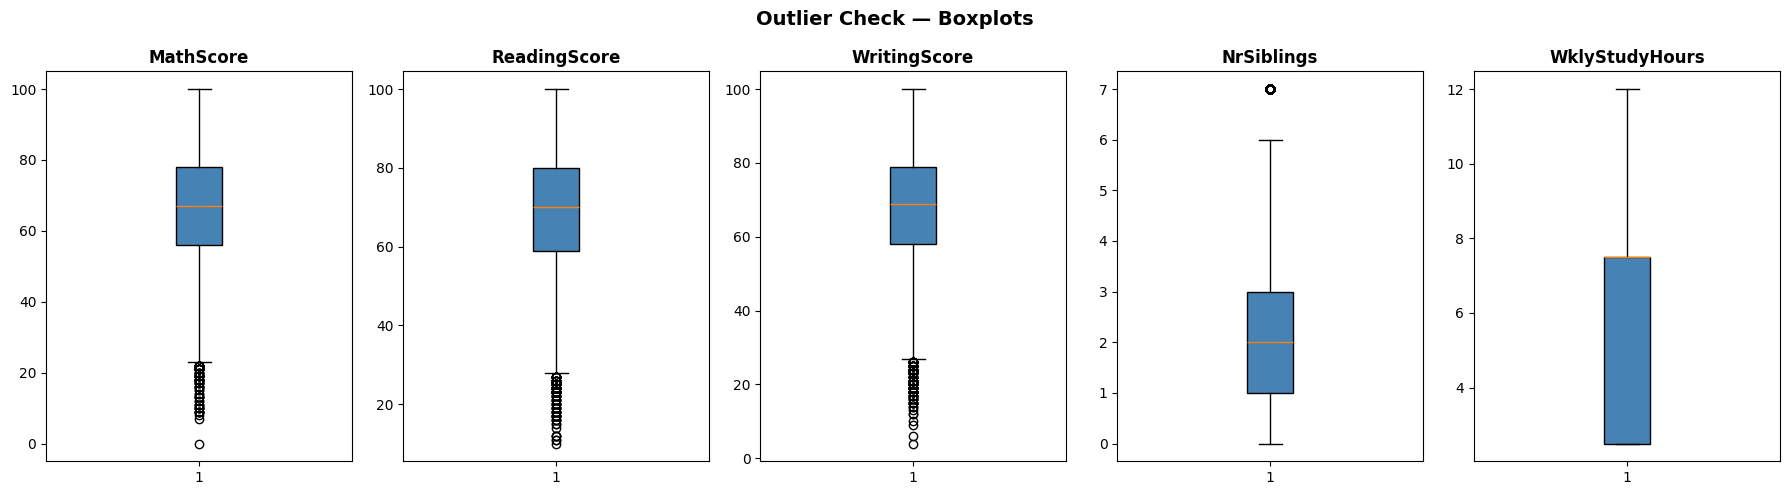

In [37]:
continuous_cols = ['MathScore', 'ReadingScore', 'WritingScore',
                   'NrSiblings', 'WklyStudyHours']

fig, axes = plt.subplots(1, 5, figsize=(18, 5))
fig.suptitle('Outlier Check — Boxplots', fontsize=14, fontweight='bold')

for ax, col in zip(axes, continuous_cols):
    ax.boxplot(df[col], patch_artist=True,
               boxprops=dict(facecolor='steelblue', color='black'))
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel('')

plt.tight_layout()
plt.savefig('boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

In [38]:
numerical_cols = ['MathScore', 'ReadingScore', 'WritingScore',
                   'NrSiblings', 'WklyStudyHours']

for col in numerical_cols:
    Q1  = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    df[col] = df[col].clip(lower_bound, upper_bound)

    print(f"{col:20s} → clipped to [{lower_bound:.2f}, {upper_bound:.2f}] | outliers clipped: {before}")

print(f"\n✅ Done")
(df[continuous_cols].describe())

MathScore            → clipped to [23.00, 111.00] | outliers clipped: 76
ReadingScore         → clipped to [27.50, 111.50] | outliers clipped: 90
WritingScore         → clipped to [26.50, 110.50] | outliers clipped: 109
NrSiblings           → clipped to [-2.00, 6.00] | outliers clipped: 291
WklyStudyHours       → clipped to [-5.00, 15.00] | outliers clipped: 0

✅ Done


,MathScore,ReadingScore,WritingScore,NrSiblings,WklyStudyHours
count,30640.000000,30640.000000,30640.000000,30640.000000,30640.000000
mean,66.574184,69.394778,68.439670,2.128949,6.919843
std,15.313444,14.705404,15.381033,1.391219,3.134092
min,23.000000,27.500000,26.500000,0.000000,2.500000
25%,56.000000,59.000000,58.000000,1.000000,2.500000
50%,67.000000,70.000000,69.000000,2.000000,7.500000
75%,78.000000,80.000000,79.000000,3.000000,7.500000
max,100.000000,100.000000,100.000000,6.000000,12.000000


In [39]:
df['MathScore'].max()

100

### Feature Engineering


In [40]:
# Rename WritingScore to ExamScore
df = df.rename(columns={'WritingScore': 'ExamScore'})


print(f"✅ Feature Engineering done")



✅ Feature Engineering done


### Define Features & Target

In [41]:
# Result based on ExamScore only — no leakage
threshold  = df['ExamScore'].median()
df['Result'] = df['ExamScore'].apply(
    lambda x: 'Pass' if x >= threshold else 'Fail'
)

y_reg = df['ExamScore']    # regression target
y_clf = df['Result']       # classification target

# Features — scores + behavioural (no ExamScore in X)
X = df[['MathScore', 'ReadingScore', 'WklyStudyHours',
        'ParentEduc', 'TestPrep_none', 'LunchType_standard',
        'PracticeSport', 'NrSiblings', 'Gender_male',
        'IsFirstChild_yes', 'TransportMeans_school_bus']]

print(f"Threshold : {threshold}")
print(f"\nClass balance:\n{y_clf.value_counts()}")
print(f"\nFeatures : {X.columns.tolist()}")

Threshold : 69.0

Class balance:
Result
Pass    15403
Fail    15237
Name: count, dtype: int64

Features : ['MathScore', 'ReadingScore', 'WklyStudyHours', 'ParentEduc', 'TestPrep_none', 'LunchType_standard', 'PracticeSport', 'NrSiblings', 'Gender_male', 'IsFirstChild_yes', 'TransportMeans_school_bus']


In [42]:
df.head()

,ParentEduc,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,ExamScore,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus,EthnicGroup_group b,EthnicGroup_group c,EthnicGroup_group d,EthnicGroup_group e,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,Result
0,4,2,3.0,2.5,71,71.0,74.0,0,1,1,1,1,0,1,0,0,1,0,0,Pass
1,2,1,0.0,7.5,69,90.0,88.0,0,1,1,1,1,0,1,0,0,1,0,0,Pass
2,5,1,4.0,2.5,87,93.0,91.0,0,1,1,1,1,1,0,0,0,0,1,0,Pass
3,3,0,1.0,7.5,45,56.0,42.0,1,0,1,0,1,0,0,0,0,1,0,0,Fail
4,2,1,0.0,7.5,76,78.0,75.0,1,1,1,1,1,0,1,0,0,1,0,0,Pass


### Train / Test Split

In [43]:
# Regression split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Classification split
X_train_c, X_test_c, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"Train size : {X_train.shape[0]} rows")
print(f"Test size  : {X_test.shape[0]} rows")
print(f"\nClass balance (train):\n{y_train_clf.value_counts()}")

Train size : 24512 rows
Test size  : 6128 rows

Class balance (train):
Result
Pass    12322
Fail    12190
Name: count, dtype: int64


### Scaling

In [44]:
scaler   = StandardScaler()
scaler_c = StandardScaler()

X_train_scaled   = scaler.fit_transform(X_train)
X_test_scaled    = scaler.transform(X_test)

X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled  = scaler_c.transform(X_test_c)

print("✅ Scaling done")

✅ Scaling done


### Linear Regression

In [55]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_reg)

y_pred_reg = linear_model.predict(X_test_scaled)

r2   = r2_score(y_test_reg, y_pred_reg)
mae  = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
cv_r2 = cross_val_score(LinearRegression(), X_train_scaled,
                         y_train_reg, cv=5, scoring='r2')

print("📊 Linear Regression Results")
print(f"  R²         : {r2:.4f}")
print(f"  MAE        : {mae:.4f}")
print(f"  RMSE       : {rmse:.4f}")
print(f"  CV Mean R² : {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")

📊 Linear Regression Results
  R²         : 0.9397
  MAE        : 3.0365
  RMSE       : 3.7766
  CV Mean R² : 0.9394 ± 0.0021


In [46]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42,
                                     class_weight='balanced')
logistic_model.fit(X_train_c_scaled, y_train_clf)

y_pred_clf = logistic_model.predict(X_test_c_scaled)

acc  = accuracy_score(y_test_clf, y_pred_clf)
prec = precision_score(y_test_clf, y_pred_clf, average='weighted')
rec  = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1   = f1_score(y_test_clf, y_pred_clf, average='weighted')
cv_acc = cross_val_score(
    LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    X_train_c_scaled, y_train_clf, cv=5, scoring='accuracy'
)

print("📊 Logistic Regression Results")
print(f"  Accuracy   : {acc:.4f} ({acc*100:.2f}%)")
print(f"  Precision  : {prec:.4f}")
print(f"  Recall     : {rec:.4f}")
print(f"  F1 Score   : {f1:.4f}")
print(f"  CV Mean Acc: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"\nDetailed Report:\n{classification_report(y_test_clf, y_pred_clf)}")

📊 Logistic Regression Results
  Accuracy   : 0.9176 (91.76%)
  Precision  : 0.9177
  Recall     : 0.9176
  F1 Score   : 0.9176
  CV Mean Acc: 0.9247 ± 0.0055

Detailed Report:
              precision    recall  f1-score   support

        Fail       0.91      0.92      0.92      3047
        Pass       0.92      0.91      0.92      3081

    accuracy                           0.92      6128
   macro avg       0.92      0.92      0.92      6128
weighted avg       0.92      0.92      0.92      6128



### Logistic Regression

In [47]:
# ============================================================
# STEP 12 — Logistic Regression
# ============================================================

# class_weight='balanced' handles the 8:1 Pass/Fail imbalance
logistic_model = LogisticRegression(max_iter=1000, random_state=42,
                                     class_weight='balanced')
logistic_model.fit(X_train_c_scaled, y_train_clf)

y_pred_clf = logistic_model.predict(X_test_c_scaled)

acc  = accuracy_score(y_test_clf, y_pred_clf)
prec = precision_score(y_test_clf, y_pred_clf, average='weighted')
rec  = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1   = f1_score(y_test_clf, y_pred_clf, average='weighted')

# cv_acc = cross_val_score(
#     LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
#     X_train_c_scaled, y_train_clf, cv=5, scoring='accuracy'
# )

print("📊 Logistic Regression Results")
print(f"  Accuracy  : {acc:.4f} ({acc*100:.2f}%)")
print(f"  Precision : {prec:.4f}")
print(f"  Recall    : {rec:.4f}")
print(f"  F1 Score  : {f1:.4f}")
# print(f"  CV Mean Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"\nDetailed Report:\n{classification_report(y_test_clf, y_pred_clf)}")

📊 Logistic Regression Results
  Accuracy  : 0.9176 (91.76%)
  Precision : 0.9177
  Recall    : 0.9176
  F1 Score  : 0.9176

Detailed Report:
              precision    recall  f1-score   support

        Fail       0.91      0.92      0.92      3047
        Pass       0.92      0.91      0.92      3081

    accuracy                           0.92      6128
   macro avg       0.92      0.92      0.92      6128
weighted avg       0.92      0.92      0.92      6128



### Actual vs Predicted (Linear Regression)

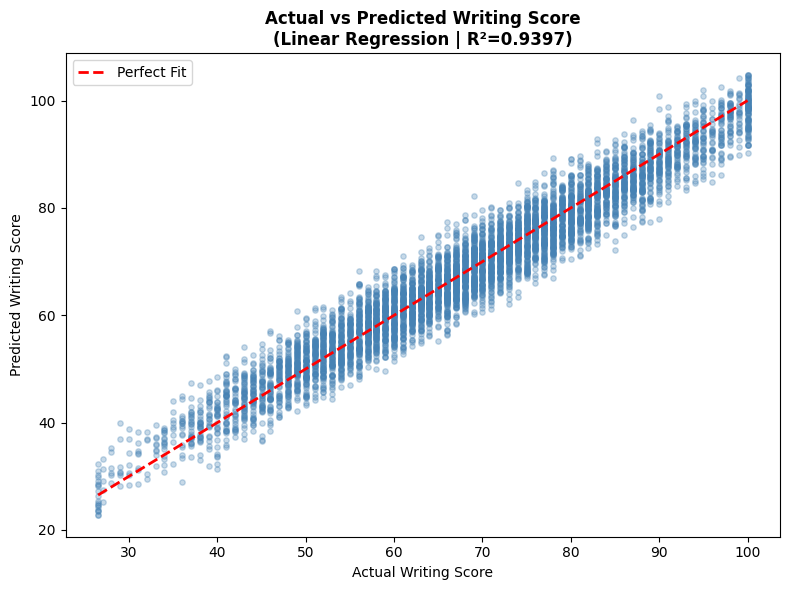

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3, color='steelblue', s=15)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', linewidth=2, label='Perfect Fit')
plt.title(f'Actual vs Predicted Writing Score\n(Linear Regression | R²={r2:.4f})', fontweight='bold')
plt.xlabel('Actual Writing Score')
plt.ylabel('Predicted Writing Score')
plt.legend()
plt.tight_layout()
plt.savefig('linear_regression_plot.png', dpi=150, bbox_inches='tight')
plt.show()

### Confusion Matrix (Logistic Regression)

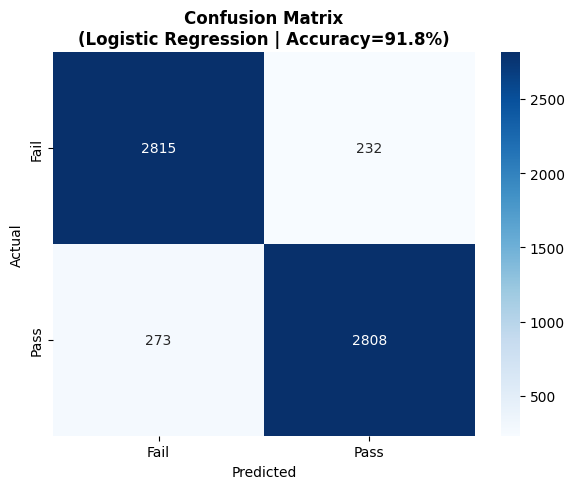

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.title(f'Confusion Matrix\n(Logistic Regression | Accuracy={acc*100:.1f}%)', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

### K means clustering

In [56]:
cluster_cols = ['ExamScore', 'WklyStudyHours', 'ParentEduc',
                'LunchType_standard', 'TestPrep_none', 'PracticeSport']

X_cluster        = df[cluster_cols].copy()
scaler_cluster   = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Find best k
inertias   = []
sil_scores = []
db_scores  = []
K_range    = range(2, 9)

for k in K_range:
    km     = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_cluster_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_cluster_scaled, labels))
    db_scores.append(davies_bouldin_score(X_cluster_scaled, labels))
    print(f"  k={k} → Inertia: {km.inertia_:.2f} | Silhouette: {sil_scores[-1]:.4f} | DB: {db_scores[-1]:.4f}")

best_k = list(K_range)[np.argmax(sil_scores)]
print(f"\n✅ Best k = {best_k} (Silhouette = {max(sil_scores):.4f})")

  k=2 → Inertia: 150751.93 | Silhouette: 0.2068 | DB: 1.9330
  k=3 → Inertia: 128165.47 | Silhouette: 0.2112 | DB: 1.7311
  k=4 → Inertia: 116067.02 | Silhouette: 0.1964 | DB: 1.6178
  k=5 → Inertia: 106114.34 | Silhouette: 0.2211 | DB: 1.6540
  k=6 → Inertia: 99023.82 | Silhouette: 0.2096 | DB: 1.5748
  k=7 → Inertia: 92893.22 | Silhouette: 0.1951 | DB: 1.4839
  k=8 → Inertia: 87721.00 | Silhouette: 0.2099 | DB: 1.6110

✅ Best k = 5 (Silhouette = 0.2211)


In [51]:
# Force k=3 for meaningful learner categories (At-Risk, Average, High-Performer)
best_k =3

km_final      = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = km_final.fit_predict(X_cluster_scaled)

# Label clusters by average ExamScore
cluster_avg   = df.groupby('Cluster')['ExamScore'].mean().sort_values()
labels_list   = ['At-Risk', 'Average', 'High-Performer']
label_map     = {cid: label for cid, label in zip(cluster_avg.index, labels_list)}

df['LearnerCategory'] = df['Cluster'].map(label_map)

print(f"Cluster Profiles:")
print(df.groupby('LearnerCategory')[['ExamScore', 'WklyStudyHours', 'ParentEduc', 'TestPrep_none']].mean().round(2))
print(f"\nCluster Sizes:\n{df['LearnerCategory'].value_counts()}")

Cluster Profiles:
                 ExamScore  WklyStudyHours  ParentEduc  TestPrep_none
LearnerCategory                                                      
At-Risk              58.64            6.94        2.17           0.92
Average              68.59            6.91        2.16           1.00
High-Performer       76.40            6.91        2.20           0.00

Cluster Sizes:
LearnerCategory
Average           13454
High-Performer     9368
At-Risk            7818
Name: count, dtype: int64


### Visualisations

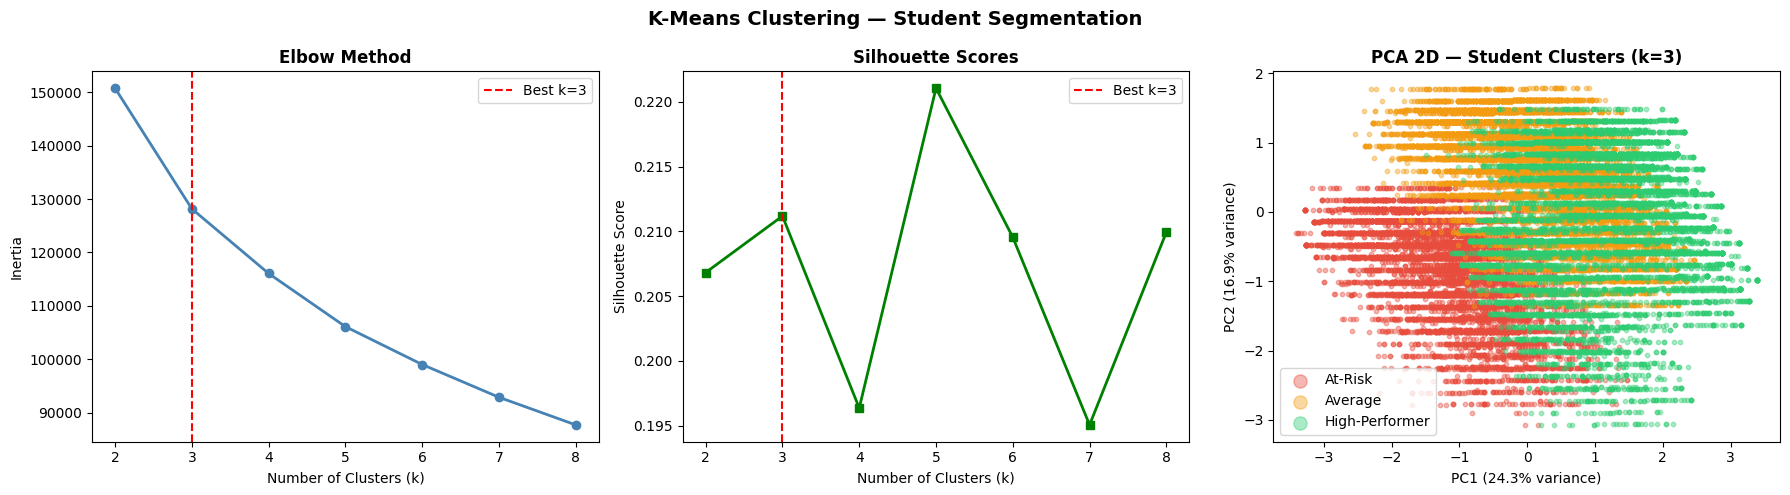

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('K-Means Clustering — Student Segmentation', fontsize=14, fontweight='bold')

# ── Plot 1: Elbow Curve
axes[0].plot(list(K_range), inertias, 'o-', color='steelblue', linewidth=2)
axes[0].axvline(best_k, color='red', linestyle='--', label=f'Best k={best_k}')
axes[0].set_title('Elbow Method', fontweight='bold')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].legend()

# ── Plot 2: Silhouette Scores
axes[1].plot(list(K_range), sil_scores, 's-', color='green', linewidth=2)
axes[1].axvline(best_k, color='red', linestyle='--', label=f'Best k={best_k}')
axes[1].set_title('Silhouette Scores', fontweight='bold')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].legend()

# ── Plot 3: PCA 2D Cluster Visualisation
pca       = PCA(n_components=2, random_state=42)
X_pca     = pca.fit_transform(X_cluster_scaled)
colors = {
    'At-Risk'        : '#e74c3c',
    'Average'        : '#f39c12',
    'High-Performer' : '#2ecc71'
}

for category, color in colors.items():
    mask = df['LearnerCategory'] == category
    axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=color, label=category, alpha=0.4, s=10)

axes[2].set_title(f'PCA 2D — Student Clusters (k={best_k})', fontweight='bold')
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[2].legend(markerscale=3)

plt.tight_layout()
plt.savefig('clustering.png', dpi=150, bbox_inches='tight')
plt.show()

In [53]:
import joblib
import os

os.makedirs('models', exist_ok=True)

joblib.dump(linear_model,   'models/linear_model.pkl')
joblib.dump(logistic_model, 'models/logistic_model.pkl')
joblib.dump(km_final,       'models/kmeans_model.pkl')
joblib.dump(scaler,         'models/scaler_reg.pkl')
joblib.dump(scaler_c,       'models/scaler_clf.pkl')
joblib.dump(scaler_cluster, 'models/scaler_cluster.pkl')

print("✅ All models saved!")

✅ All models saved!


In [54]:
# Download all models as zip
import shutil
from google.colab import files

shutil.make_archive('models', 'zip', 'models')
files.download('models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>